# CoDel Test
This test compares the CoDel(and blocking) enabled model vs original model

In order to see the effect of CoDel and Blocking, we need to compare the two runs:
First run, we **Enable** Blocking mechanism:

In [39]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True
total bytes = 42462624.66931789
total time = 300.0
average throughput(MB/s) = 0.13498504851442303


blocing is ENABLED
average bluestore latency is 21738.00720193149


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

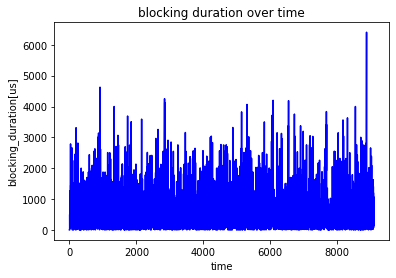

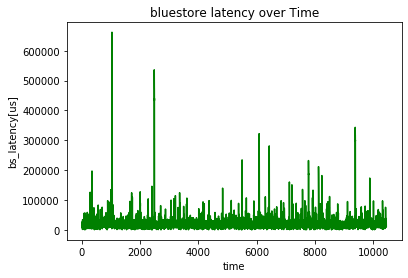

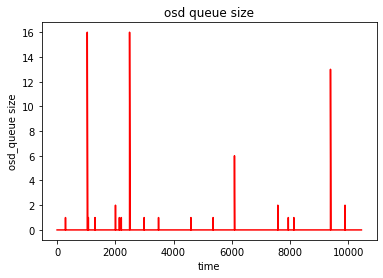

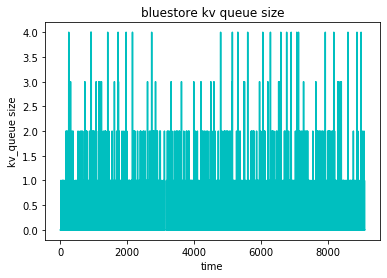

In [40]:
import matplotlib
import matplotlib.pyplot as plt

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
bs_lat_size = len(bs_lat_list)
bs_lat_sum = sum(bs_lat_list)
avg_ls_lat = bs_lat_sum / bs_lat_size
print("blocing is ENABLED")
print("average bluestore latency is",avg_ls_lat)

# get avg throughput and latency (from client perspective)


fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

fig, ax = plt.subplots()
ax.plot(bs_lat_list, 'g-')
ax.set(xlabel='time', ylabel='bs_latency[us]', title='bluestore latency over Time')

fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

In second run, we **disable** the Blocking mechanism: make sure enableBlocking is **False**

In [ ]:
run -i ../../scripts/radossim_blocking.py